In [2]:
!pip install opencv-python==3.1.0.4

     |████████████████████████████████| 6.2MB 4.5MB/s 
ERROR: dopamine-rl 1.0.5 has requirement opencv-python>=3.4.1.15, but you'll have opencv-python 3.1.0.4 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 # opencv 

In [5]:
!wget https://www.dropbox.com/sh/p87f33rjkkevu9z/AAA963Q5FMQXHl-XIxxLsDDJa

--2020-11-15 15:06:39--  https://www.dropbox.com/sh/p87f33rjkkevu9z/AAA963Q5FMQXHl-XIxxLsDDJa
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/p87f33rjkkevu9z/AAA963Q5FMQXHl-XIxxLsDDJa [following]
--2020-11-15 15:06:40--  https://www.dropbox.com/sh/raw/p87f33rjkkevu9z/AAA963Q5FMQXHl-XIxxLsDDJa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucacf78ccb8dd8ec2b1f68ed0ece.dl.dropboxusercontent.com/zip_download_get/Amr_OpcO4TQf3rV2Lb75kxmdSLp7nIuPiBf08hPpQxAGjNYeFjoPdQAD1SHPu3rz6A8HLhgAd8-p0_C235pXqVut5QXbhATL_xBdPLHt1IXJGA [following]
--2020-11-15 15:06:40--  https://ucacf78ccb8dd8ec2b1f68ed0ece.dl.dropboxusercontent.com/zip_download_get/Amr_OpcO4TQf3rV2Lb75kxmdSLp7nIuPiBf08hPpQxAGjNYeFjoPdQAD1SHPu3rz6A8HLhgAd8-p0_C235pXqV

In [6]:
!unzip AAA963Q5FMQXHl-XIxxLsDDJa

Archive:  AAA963Q5FMQXHl-XIxxLsDDJa
mapname:  conversion of  failed
 extracting: glasses.png             
 extracting: mustache.png            
 extracting: Nose18x15.xml           
 extracting: Jamie_Before.jpg        
 extracting: frontalEyes35x16.xml    


In [7]:
noseCascade = cv2.CascadeClassifier('/content/Nose18x15.xml')
eyesCascade = cv2.CascadeClassifier('/content/frontalEyes35x16.xml')

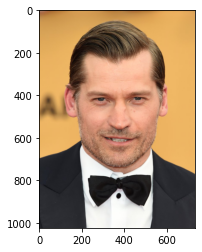

In [56]:
img = plt.imread('Jamie_Before.jpg')
plt.imshow(img)

In [57]:
img.shape

(1024, 733, 3)

In [58]:
eye = eyesCascade.detectMultiScale(img)[0]
print(eye)

[218 349 317 145]


In [59]:
eye_x, eye_y, eye_w, eye_h = eye

In [60]:
nose = noseCascade.detectMultiScale(img, 1.5)[0]
print(nose)
nose_x , nose_y, nose_w, nose_h = nose

[308 476 137 114]


In [61]:
# img = cv2.rectangle(img, (eye_x, eye_y), (eye_x + eye_w, eye_y + eye_h), (255,255,255), 2 )
# img = cv2.rectangle(img, (nose_x, nose_y), (nose_x + nose_w, nose_y + nose_h), (255,255,255), 2 )

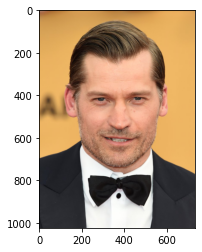

In [62]:
plt.imshow(img)

In [63]:
mustache = plt.imread('./mustache.png')
glasses = plt.imread('./glasses.png')

In [64]:
mustache.shape

(320, 640, 4)

In [65]:
glasses = cv2.resize(glasses, (eye_w, eye_h))

In [66]:
glasses.shape

(145, 317, 4)

In [67]:
img = img.copy()

In [68]:
for i in range(glasses.shape[0]):
  for j in range(glasses.shape[1]):
    if glasses[i,j,3] > 0:
      img[eye_y + i, eye_x + j, :] = glasses[i, j, :-1]

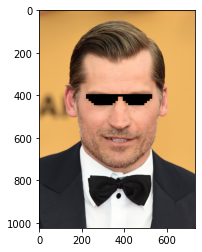

In [69]:
plt.imshow(img)

In [70]:
mustache = cv2.resize(mustache, (nose_w, nose_h))

In [71]:
for i in range(mustache.shape[0]):
  for j in range(mustache.shape[1]):
    if mustache[i,j,3] > 0:
      img[nose_y + i , nose_x + j, :] = mustache[i, j, :-1]

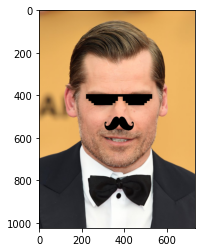

In [72]:
plt.imshow(img)